In [72]:
#import libraries
import pandas as pd
import requests
import tweepy
import json
import re
from datetime import datetime
import time
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
#read the twitter archive file
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [74]:
#import the tweet image using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
#read the image predictions file
image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [75]:
# get your consumer key, consumer secret ,access token and access secret from twitter to get WeRAteDogs dataset
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


In [76]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key,consumer_secret) 
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth)

In [77]:
#add tweets to tweet_json.txt
with open('tweet_json.txt','a') as file:
    for every_tweet in twitter_df.tweet_id:
        try:
            tweet = api.get_status(every_tweet , tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

In [78]:
#make an empty list
#load the json material in tweet_json.txt

tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [79]:
#create the json_tweets data frame
json_tweets = pd.DataFrame()

In [80]:
#add the necessary columns to the data frame
json_tweets['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
json_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
json_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assess


##### Look at twitter dataset 

In [81]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [82]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [83]:
# Check for duplicated tweets
twitter_df.tweet_id.duplicated().sum()

0

In [84]:
#check the number of sources in twitter archive
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [85]:
# Check for retweets
twitter_df[twitter_df.retweeted_status_id.notnull()].retweeted_status_id.count()

181

In [86]:
# Check answers to tweets
twitter_df[twitter_df.in_reply_to_status_id.notnull()].in_reply_to_status_id.count()

78

In [87]:
# See individual value count in name column
twitter_df.name.value_counts() 

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Toby          7
Buddy         7
Bailey        7
an            7
Jack          6
Jax           6
Oscar         6
Rusty         6
Scout         6
Leo           6
Dave          6
Bella         6
Stanley       6
Koda          6
Milo          6
Oakley        5
           ... 
Coleman       1
Ambrose       1
Doobert       1
DayZ          1
Kevon         1
Chesney       1
Buddah        1
Cheryl        1
Pip           1
Deacon        1
Rupert        1
Jeb           1
Howie         1
Brownie       1
Vixen         1
Lupe          1
Jackie        1
Ron           1
Ridley        1
Steve         1
Ricky         1
Petrick       1
Shooter       1
Sundance      1
Theo          1
Kendall       1
this          1
Ralpher       1
Stella        1
Nida          1
Name: name, Length: 957,

In [88]:
#sort names
twitter_df.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [89]:
# Check values on the column doggo
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [90]:
# Check values on the column floofer
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [91]:
# Check values on the column pupper
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [92]:
# Check values on the column puppo
twitter_df.puppo.value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

##### Look at Json


In [93]:
#display the json tweets data frame
json_tweets

,id,retweet_count,favorite_count
0,892420643555336193,8188,37541
1,892177421306343426,6058,32273
2,891815181378084864,4008,24312
3,891689557279858688,8343,40886
4,891327558926688256,9037,39084
5,891087950875897856,3002,19660
6,890971913173991426,1985,11488
7,890729181411237888,18191,63345
8,890609185150312448,4120,27022
9,890240255349198849,7111,30970


In [94]:
#display info for json_tweets
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 3 columns):
id                4415 non-null int64
retweet_count     4415 non-null int64
favorite_count    4415 non-null int64
dtypes: int64(3)
memory usage: 103.6 KB


In [95]:
#display head for json_tweets
json_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8188,37541
1,892177421306343426,6058,32273
2,891815181378084864,4008,24312
3,891689557279858688,8343,40886
4,891327558926688256,9037,39084


In [96]:
#display statistics for json_tweets
json_tweets.describe()

,id,retweet_count,favorite_count
count,4.415000e+03,4415.000000,4415.000000
mean,8.199818e+17,5047.238505,14343.561042
std,3.692912e+16,5678.863917,15077.539689
min,7.588287e+17,1.000000,0.000000
25%,7.892808e+17,2083.500000,5439.000000
50%,8.185365e+17,3443.000000,10983.000000
75%,8.482137e+17,5909.000000,20264.000000
max,8.924206e+17,60151.000000,138514.000000


##### image dataset

In [97]:
#display info for image predictions data frame
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [98]:
#display statistics for images predictions
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [99]:
# Check dataset content
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [100]:
# Check the number of images with multiple breed predictions
image[~image.p1_dog & ~image.p2_dog & ~image.p3_dog].tweet_id.count()


324

In [101]:
#check the number of images
image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [102]:
#check for duplicate tweet_ids in the image dataframe
sum(image.tweet_id.duplicated())

0

## Quality

#### twitter_df dataset
    - There are 181 retweets.
    - There are 78 response tweets.
    - Timestamp column is a string instead of Datetime.
    - Missing dog names (replaced with 'None')
    - Incorrect dog names

    

##### image
    -For columns p1, p2 & p3. The breed names are lower case.
    -Breeds named '_'.
    -Invalid data type for breed columns.


## Tidiness

     - json_tweets has column name id. 
     - Join all 3 dataframes.

## Clean

In [103]:
#Keeping the original dataset. Making a copy of the datasets.
twitter_clean = twitter_df.copy()
image_clean = image.copy()
json_clean = json_tweets.copy()




##### Quality 
    twitter_df: there are 181 retweets. 

##### Define
    Delete all retweet rows.

##### Code

In [104]:
twitter_clean.drop(twitter_clean.index[twitter_clean.retweeted_status_id.notnull()], inplace=True)

##### Test

In [105]:
twitter_clean[twitter_clean.retweeted_status_id.notnull()].retweeted_status_id.count()


0

##### Quality
twitter_df: There are 78 response tweets.



##### Define
    Delete all rows that are response tweets.




##### Code

In [106]:
twitter_clean.drop(twitter_clean.index[twitter_clean.in_reply_to_status_id.notnull()], inplace=True)

##### Test

In [107]:
twitter_clean[twitter_clean.in_reply_to_status_id.notnull()].in_reply_to_status_id.count()


0

##### Quality
       twitter_df: Timestamp column is a string instead of Datetime.

##### Define
    Convert timestamp from object to datetime.

##### Code


In [108]:
twitter_clean.timestamp = twitter_clean.timestamp.str[:-6].astype('datetime64[ns]')


##### Test

In [109]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

##### Quality
    twitter_df: Missing dog names (replaced with 'None')
    
##### Define
    Remove the lines that have dog name as 'None'.



##### Code

In [110]:
twitter_clean = twitter_clean[twitter_clean.name != "None"]


##### Test

In [111]:
sum(twitter_clean.name == "None")


0

##### Quality
    twitter_df: Incorrect dog names

##### Define

    Remove the lines that have incorrect dog names.

##### Code

In [112]:
lowercase = []

for word in twitter_clean['name']:
    if word.islower():
         lowercase.append(word)
            
Counter(lowercase)

Counter({'such': 1,
         'a': 55,
         'quite': 3,
         'not': 2,
         'one': 4,
         'incredibly': 1,
         'very': 4,
         'my': 1,
         'his': 1,
         'an': 6,
         'actually': 2,
         'just': 3,
         'getting': 2,
         'mad': 1,
         'this': 1,
         'unacceptable': 1,
         'all': 1,
         'old': 1,
         'infuriating': 1,
         'the': 8,
         'by': 1,
         'officially': 1,
         'life': 1,
         'light': 1,
         'space': 1})

In [113]:
twitter_clean = twitter_clean[twitter_clean.name.map(lambda word: word.istitle())]


##### Test

In [114]:
#check if any lowercase letter names left
lowercase2 = []

for word in twitter_clean['name']:
    if word.islower():
         lowercase2.append(word)
            
Counter(lowercase2)

Counter()

##### Quality
    image: For columns p1, p2 & p3. The breed names are lower case.

##### Define
    Make the first letter uppercase.

##### Code

In [115]:
image_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [116]:
image_clean['p1'] = image_clean.p1.str.title()
image_clean['p2'] = image_clean.p2.str.title()
image_clean['p3'] = image_clean.p3.str.title()

##### Test

In [117]:
image_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### Quality
    image: Breed named as '_'.

###### Define
    Replace '_' with space in breed column.

##### Code

In [118]:

image_clean.p1 = image_clean.p1.str.replace('_', ' ')
image_clean.p2 = image_clean.p2.str.replace('_', ' ')
image_clean.p3 = image_clean.p3.str.replace('_', ' ')

##### Test

In [119]:
image_clean.p1.str.contains('_').value_counts()

False    2075
Name: p1, dtype: int64

In [120]:
image_clean.p2.str.contains('_').value_counts()

False    2075
Name: p2, dtype: int64

In [121]:
image_clean.p3.str.contains('_').value_counts()

False    2075
Name: p3, dtype: int64

##### Quality
    image: Invalid data type for breed columns.

##### Define
    Convert breed columns from object to categorical.

##### Code

In [122]:
image_clean.p1 = image_clean.p1.astype('category')
image_clean.p2 = image_clean.p2.astype('category')
image_clean.p3 = image_clean.p3.astype('category')

##### Test

In [123]:
image_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


## Tidiness

##### Quality
    json_tweets: Has Invalid column name id.
##### Define
    rename id column of tweet_json to tweet_id¶


##### Code

In [124]:
json_clean = json_clean.rename(columns = {'id':'tweet_id'})

##### Test

In [125]:
json_clean.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8188,37541
1,892177421306343426,6058,32273
2,891815181378084864,4008,24312
3,891689557279858688,8343,40886
4,891327558926688256,9037,39084


##### Quality
    Join all 3 dataframes
##### Define
    join twitter_clean , image_clean and json_clean

In [126]:
# merge twitter_clean with image_clean
twitter_clean = pd.merge(left=twitter_clean, right=image_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [127]:
#merge twitter_clean with json_clean
twitter_clean = pd.merge(left = twitter_clean, right = json_clean, left_on = 'tweet_id', right_on = 'tweet_id',how = 'inner')

##### Test

In [128]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2644
Data columns (total 30 columns):
tweet_id                      2645 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2645 non-null datetime64[ns]
source                        2645 non-null object
text                          2645 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2645 non-null object
rating_numerator              2645 non-null int64
rating_denominator            2645 non-null int64
name                          2645 non-null object
doggo                         2645 non-null object
floofer                       2645 non-null object
pupper                        2645 non-null object
puppo                         2645 non-null object
jpg_url                       26

In [129]:
#store file
twitter_clean.to_csv('twitter_archive_master.csv',index = False , encoding = 'utf-8')

## Insights

In [130]:
twitter_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.645000e+03,0.0,0.0,0.0,0.0,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2.645000e+03,2645.000000,2645.000000
mean,8.202772e+17,NaN,NaN,NaN,NaN,12.143667,9.994329,1.340265,0.634759,0.138676,5.881695e-02,4560.795085,17381.653686
std,3.806657e+16,NaN,NaN,NaN,NaN,3.095517,0.130336,0.726045,0.256123,0.103997,5.308821e-02,4951.716769,13796.212932
min,7.588547e+17,NaN,NaN,NaN,NaN,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,464.000000,2855.000000
25%,7.878106e+17,NaN,NaN,NaN,NaN,11.000000,10.000000,1.000000,0.423150,0.051928,1.201160e-02,2159.000000,8990.000000
50%,8.185365e+17,NaN,NaN,NaN,NaN,12.000000,10.000000,1.000000,0.657967,0.122978,4.526270e-02,3271.000000,13304.000000
75%,8.490519e+17,NaN,NaN,NaN,NaN,13.000000,10.000000,1.000000,0.874566,0.199482,9.411200e-02,5068.000000,21697.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,75.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,60151.000000,125339.000000


In [131]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2644
Data columns (total 30 columns):
tweet_id                      2645 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2645 non-null datetime64[ns]
source                        2645 non-null object
text                          2645 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2645 non-null object
rating_numerator              2645 non-null int64
rating_denominator            2645 non-null int64
name                          2645 non-null object
doggo                         2645 non-null object
floofer                       2645 non-null object
pupper                        2645 non-null object
puppo                         2645 non-null object
jpg_url                       26

In [62]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8188,37541
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8188,37549
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8188,37549
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8188,37550
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6058,32273


In [132]:
#check for duplicate value
sum(twitter_clean.duplicated())

1238

In [133]:
#drop duplicates
twitter_clean = twitter_clean.drop_duplicates()

In [134]:
#confirm duplicates removed
sum(twitter_clean.duplicated())


0

In [135]:
#check info
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 2642
Data columns (total 30 columns):
tweet_id                      1407 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1407 non-null datetime64[ns]
source                        1407 non-null object
text                          1407 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1407 non-null object
rating_numerator              1407 non-null int64
rating_denominator            1407 non-null int64
name                          1407 non-null object
doggo                         1407 non-null object
floofer                       1407 non-null object
pupper                        1407 non-null object
puppo                         1407 non-null object
jpg_url                       14

In [137]:
#Find columns with missing values
twitter_clean.columns[twitter_clean.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp'],
      dtype='object')

In [139]:
#drop missing values

columns_list = twitter_clean.columns[twitter_clean.isnull().any()]
twitter_clean.drop(columns_list, axis=1, inplace=True)

In [140]:
#Verify, if missing values are dropped.
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 2642
Data columns (total 25 columns):
tweet_id              1407 non-null int64
timestamp             1407 non-null datetime64[ns]
source                1407 non-null object
text                  1407 non-null object
expanded_urls         1407 non-null object
rating_numerator      1407 non-null int64
rating_denominator    1407 non-null int64
name                  1407 non-null object
doggo                 1407 non-null object
floofer               1407 non-null object
pupper                1407 non-null object
puppo                 1407 non-null object
jpg_url               1407 non-null object
img_num               1407 non-null int64
p1                    1407 non-null category
p1_conf               1407 non-null float64
p1_dog                1407 non-null bool
p2                    1407 non-null category
p2_conf               1407 non-null float64
p2_dog                1407 non-null bool
p3                    1407 

## Descriptive statistics

In [141]:
twitter_clean.describe()


,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.407000e+03,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1.407000e+03,1407.000000,1407.000000
mean,8.223460e+17,12.222459,9.995736,1.353234,0.641210,0.137955,5.763818e-02,5173.023454,19221.582800
std,3.830263e+16,3.219713,0.113067,0.741688,0.254005,0.104720,5.255328e-02,5921.282429,15791.739267
min,7.588547e+17,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,464.000000,2855.000000
25%,7.895309e+17,12.000000,10.000000,1.000000,0.432580,0.049995,1.184725e-02,2351.000000,9604.500000
50%,8.211496e+17,12.000000,10.000000,1.000000,0.661953,0.124353,4.400190e-02,3591.000000,15379.000000
75%,8.526726e+17,13.000000,10.000000,1.000000,0.878822,0.199342,9.219820e-02,5825.000000,23523.500000
max,8.924206e+17,75.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,60151.000000,125339.000000


In [142]:
#count the number of ratings 
twitter_clean['rating_numerator'].value_counts()

12    549
13    457
11    257
10     72
14     47
8       4
75      3
27      3
7       3
5       3
24      2
9       2
6       2
4       2
3       1
Name: rating_numerator, dtype: int64

##### The most common rating numerator is 12, followed by 13, 11 and 10. We also have outliers 75, 27, 24.



Text(0.5,1,'Ratings Distribution')

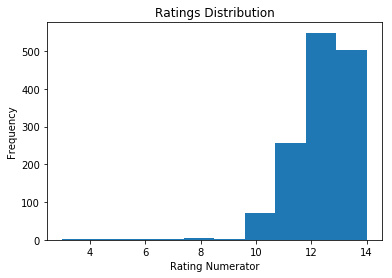

In [144]:
#plot the count of rating numerators between 3 and 14
plt.hist(twitter_clean['rating_numerator'], range = (3, 14));
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

##### The plot shows, that the graph is left skewed with a peak at 12.

In [147]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.407000e+03,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1.407000e+03,1407.000000,1407.000000
mean,8.223460e+17,12.222459,9.995736,1.353234,0.641210,0.137955,5.763818e-02,5173.023454,19221.582800
std,3.830263e+16,3.219713,0.113067,0.741688,0.254005,0.104720,5.255328e-02,5921.282429,15791.739267
min,7.588547e+17,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,464.000000,2855.000000
25%,7.895309e+17,12.000000,10.000000,1.000000,0.432580,0.049995,1.184725e-02,2351.000000,9604.500000
50%,8.211496e+17,12.000000,10.000000,1.000000,0.661953,0.124353,4.400190e-02,3591.000000,15379.000000
75%,8.526726e+17,13.000000,10.000000,1.000000,0.878822,0.199342,9.219820e-02,5825.000000,23523.500000
max,8.924206e+17,75.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,60151.000000,125339.000000


##### Let's Observe the tweet with maximum number of likes (favorite_count) and retweets (retweet_count).

In [151]:
#highest rated dog
twitter_clean['rating_numerator'].value_counts()

12    549
13    457
11    257
10     72
14     47
8       4
75      3
27      3
7       3
5       3
24      2
9       2
6       2
4       2
3       1
Name: rating_numerator, dtype: int64

In [153]:
#check highest rated dog
twitter_clean[twitter_clean.rating_numerator == 75]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2005,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,...,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6580,19212
2006,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,...,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6577,19204
2008,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,...,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6577,19205


##### we can see that The highest rated dog is Logan.


In [155]:
#check the lowest rated dog
twitter_clean[twitter_clean.rating_numerator == 3]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2205,777885040357281792,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,...,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1764,6693


##### We can see that the lowest rated dog is Wesley.

In [156]:
twitter_clean[twitter_clean.favorite_count == twitter_clean.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1580,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,...,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339


In [157]:
twitter_clean[twitter_clean.retweet_count == twitter_clean.retweet_count.max()]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1580,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,...,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339


##### Most liked and Most favorite was the same dog named Stephan.


Text(0,0.5,'Likes')

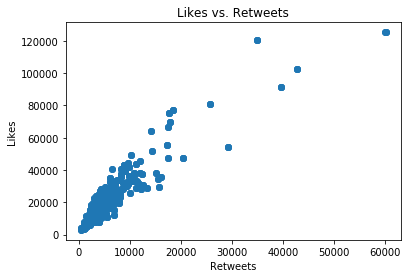

In [162]:

#create scatter plot between retweets and favorites
plt.scatter(twitter_clean['retweet_count'], twitter_clean['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

##### This graph shows strong positive correlation between retweets and Favorites.